#### packages

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import sklearn
import scipy
import matplotlib.pyplot as plt
import forestplot as fp

In [2]:
pd.options.display.float_format = '{:.5f}'.format

In [3]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

##### Data

In [4]:
df = pd.read_csv('re_0826.csv', encoding='cp949')
df.isnull().sum()

pid              0
majorcat         0
province         0
area             0
sex              0
                ..
주당근로시간           0
주당근로시간_binary    0
직장에서의복리후생제공여부    0
보험가입여부           0
직장만족도            0
Length: 141, dtype: int64

In [5]:
df_copy = df.copy()
수도권 = df_copy[(df_copy['사업체지역']=='서울')|(df_copy['사업체지역']=='경기')].copy()

In [7]:
model = sm.Logit.from_formula('''LongWork2 ~ age + C(성별,Treatment("여자")) + C(건강상태,Treatment('건강하지않다'))''', 수도권).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.346733
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              LongWork2   No. Observations:                 2333
Model:                          Logit   Df Residuals:                     2328
Method:                           MLE   Df Model:                            4
Date:                Thu, 31 Aug 2023   Pseudo R-squ.:                 0.06593
Time:                        17:03:43   Log-Likelihood:                -808.93
converged:                       True   LL-Null:                       -866.03
Covariance Type:            nonrobust   LLR p-value:                 9.258e-24
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                              -10.1074      0.832    -12.152      0.000     -11.738      -8.477
C(성별, Treatment("여자"))[T.남자]            -0.2166      0.146     -1.484      0.138      -0.503       0.069
C(건강상태, Treatment('건강하지않다'))[T.건강하다]     0.3466      0.214      1.618      0.106      -0.073       0.766
C(건강상태, Treatment('건강하지않다'))[T.보통이다]     0.0255      0.234      0.109      0.913      -0.434       0.485
age                                      0.3032      0.031      9.781      0.000       0.242       0.364
========================================================================================================
"""

In [8]:
print(f'모델 AIC:{model.aic}')
print('\n')

# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": model.params,
        "Lower CI": model.conf_int()[0],
        "Upper CI": model.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

모델 AIC:1627.85562898194




,OR,Lower CI,Upper CI
Intercept,0.00004,0.00001,0.00021
"C(성별, Treatment(""여자""))[T.남자]",0.80522,0.60487,1.07193
"C(건강상태, Treatment('건강하지않다'))[T.건강하다]",1.41424,0.92933,2.15215
"C(건강상태, Treatment('건강하지않다'))[T.보통이다]",1.02587,0.64793,1.62425
age,1.35420,1.27437,1.43903


In [9]:
model_2 = sm.Logit.from_formula('''LongWork2 ~ 나이 + C(성별,Treatment("여자")) 
                                + C(건강상태,Treatment("건강하지않다")) 
    + C(전공일치,Treatment("맞지않다")) + 학점 + C(재학중일자리경험,Treatment('없다'))''', 수도권).fit()
model_2.summary()

Optimization terminated successfully.
         Current function value: 0.336701
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              LongWork2   No. Observations:                 2213
Model:                          Logit   Df Residuals:                     2204
Method:                           MLE   Df Model:                            8
Date:                Thu, 31 Aug 2023   Pseudo R-squ.:                 0.08782
Time:                        17:08:20   Log-Likelihood:                -745.12
converged:                       True   LL-Null:                       -816.85
Covariance Type:            nonrobust   LLR p-value:                 4.502e-27
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -9.5911      0.954    -10.056      0.000     -11.460      -7.722
C(성별, Treatment("여자"))[T.남자]            -0.2401      0.153     -1.573      0.116      -0.539       0.059
C(건강상태, Treatment("건강하지않다"))[T.건강하다]     0.3670      0.231      1.591      0.112      -0.085       0.819
C(건강상태, Treatment("건강하지않다"))[T.보통이다]     0.0706      0.252      0.281      0.779      -0.423       0.564
C(전공일치, Treatment("맞지않다"))[T.보통이다]       0.1588      0.174      0.913      0.361      -0.182       0.500
C(전공일치, Treatment("맞지않다"))[T.잘맞다]        0.5211      0.159      3.285      0.001       0.210       0.832
C(재학중일자리경험, Treatment('없다'))[T.있다]      -0.5911      0.137     -4.311      0.000      -0.860      -0.322
나이                                       0.3054      0.032      9.486      0.000       0.242       0.368
학점                                      -0.1760      0.125     -1.411      0.158      -0.420       0.068
========================================================================================================
"""

In [10]:
print(f'모델 AIC:{model_2.aic}')
print('\n')

# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": model_2.params,
        "Lower CI": model_2.conf_int()[0],
        "Upper CI": model_2.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

모델 AIC:1508.2386878541408




,OR,Lower CI,Upper CI
Intercept,0.00007,0.00001,0.00044
"C(성별, Treatment(""여자""))[T.남자]",0.78655,0.58322,1.06076
"C(건강상태, Treatment(""건강하지않다""))[T.건강하다]",1.44343,0.91838,2.26865
"C(건강상태, Treatment(""건강하지않다""))[T.보통이다]",1.07317,0.65521,1.75776
"C(전공일치, Treatment(""맞지않다""))[T.보통이다]",1.17216,0.83347,1.64846
"C(전공일치, Treatment(""맞지않다""))[T.잘맞다]",1.68382,1.23391,2.29779
"C(재학중일자리경험, Treatment('없다'))[T.있다]",0.55370,0.42320,0.72444
나이,1.35713,1.27415,1.44553
학점,0.83865,0.65679,1.07087


In [11]:
model_3 = sm.Logit.from_formula('''LongWork2 ~ 나이 + C(성별,Treatment('여자')) + C(건강상태,Treatment('건강하지않다')) 
    + C(전공일치,Treatment('맞지않다'))
    + 학점 + C(재학중일자리경험,Treatment('없다')) + C(삶의만족도_개인,Treatment('그렇지않다')) 
    + C(삶의만족도_관계, Treatment('그렇지않다')) + C(삶의만족도_소속집단, Treatment('그렇지않다')) +
    C(업무만족도,Treatment('그렇지않다')) ''', 수도권).fit()
model_3.summary()

Optimization terminated successfully.
         Current function value: 0.325673
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              LongWork2   No. Observations:                 2213
Model:                          Logit   Df Residuals:                     2196
Method:                           MLE   Df Model:                           16
Date:                Thu, 31 Aug 2023   Pseudo R-squ.:                  0.1177
Time:                        17:14:00   Log-Likelihood:                -720.72
converged:                       True   LL-Null:                       -816.85
Covariance Type:            nonrobust   LLR p-value:                 2.869e-32
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    -9.2277      0.983     -9.389      0.000     -11.154      -7.302
C(성별, Treatment('여자'))[T.남자]                 -0.2854      0.156     -1.833      0.067      -0.590       0.020
C(건강상태, Treatment('건강하지않다'))[T.건강하다]          0.2522      0.250      1.011      0.312      -0.237       0.741
C(건강상태, Treatment('건강하지않다'))[T.보통이다]          0.0940      0.262      0.360      0.719      -0.419       0.607
C(전공일치, Treatment('맞지않다'))[T.보통이다]            0.1022      0.178      0.575      0.565      -0.246       0.450
C(전공일치, Treatment('맞지않다'))[T.잘맞다]             0.2897      0.165      1.751      0.080      -0.035       0.614
C(재학중일자리경험, Treatment('없다'))[T.있다]           -0.6067      0.140     -4.337      0.000      -0.881      -0.333
C(삶의만족도_개인, Treatment('그렇지않다'))[T.그렇다]       -0.3597      0.287     -1.255      0.210      -0.922       0.202
C(삶의만족도_개인, Treatment('그렇지않다'))[T.보통이다]      -0.3381      0.251     -1.349      0.177      -0.829       0.153
C(삶의만족도_관계, Treatment('그렇지않다'))[T.그렇다]       -0.6536      0.373     -1.754      0.079      -1.384       0.077
C(삶의만족도_관계, Treatment('그렇지않다'))[T.보통이다]      -0.3411      0.258     -1.320      0.187      -0.848       0.165
C(삶의만족도_소속집단, Treatment('그렇지않다'))[T.그렇다]      0.8138      0.329      2.476      0.013       0.170       1.458
C(삶의만족도_소속집단, Treatment('그렇지않다'))[T.보통이다]     0.4590      0.218      2.108      0.035       0.032       0.886
C(업무만족도, Treatment('그렇지않다'))[T.그렇다]          -1.2963      0.234     -5.548      0.000      -1.754      -0.838
C(업무만족도, Treatment('그렇지않다'))[T.보통이다]         -0.5057      0.155     -3.267      0.001      -0.809      -0.202
나이                                            0.3119      0.033      9.459      0.000       0.247       0.376
학점                                           -0.1495      0.127     -1.175      0.240      -0.399       0.100
=============================================================================================================
"""

In [12]:
print(f'모델 AIC:{model_3.aic}')
print('\n')

# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": model_3.params,
        "Lower CI": model_3.conf_int()[0],
        "Upper CI": model_3.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

모델 AIC:1475.4300743426832




,OR,Lower CI,Upper CI
Intercept,0.00010,0.00001,0.00067
"C(성별, Treatment('여자'))[T.남자]",0.75175,0.55406,1.01997
"C(건강상태, Treatment('건강하지않다'))[T.건강하다]",1.28691,0.78901,2.09899
"C(건강상태, Treatment('건강하지않다'))[T.보통이다]",1.09861,0.65797,1.83435
"C(전공일치, Treatment('맞지않다'))[T.보통이다]",1.10756,0.78199,1.56867
"C(전공일치, Treatment('맞지않다'))[T.잘맞다]",1.33600,0.96605,1.84764
"C(재학중일자리경험, Treatment('없다'))[T.있다]",0.54513,0.41441,0.71710
"C(삶의만족도_개인, Treatment('그렇지않다'))[T.그렇다]",0.69787,0.39789,1.22400
"C(삶의만족도_개인, Treatment('그렇지않다'))[T.보통이다]",0.71310,0.43637,1.16530
"C(삶의만족도_관계, Treatment('그렇지않다'))[T.그렇다]",0.52017,0.25060,1.07969


In [16]:
odds_ratios['label'] = odds_ratios.index
odds_ratios.shape

(18, 4)

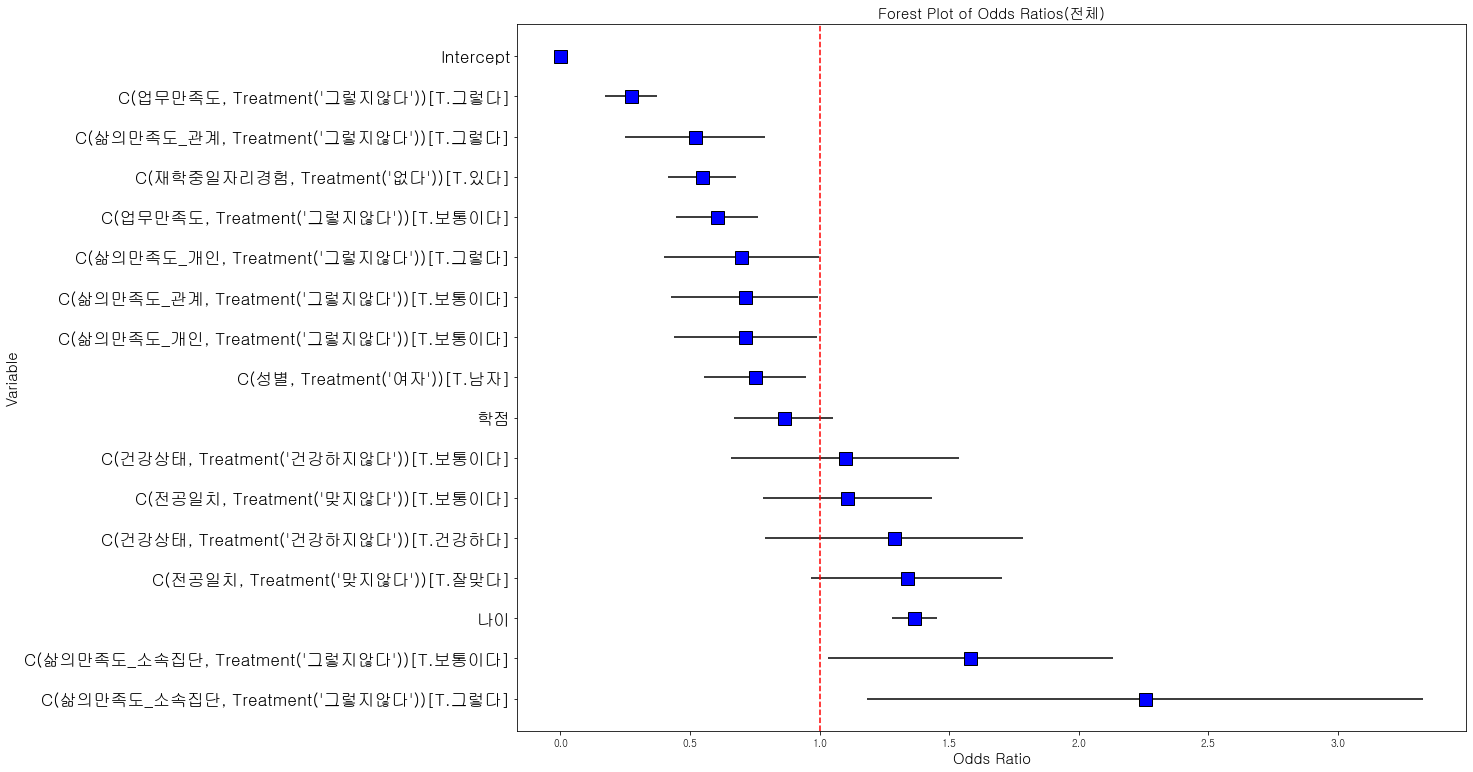

In [15]:
# 오즈비 순서대로 

# Define the data
data = [(var, odds_ratios.loc[var, "OR"], odds_ratios.loc[var, "Lower CI"], odds_ratios.loc[var, "Upper CI"]) for var in odds_ratios.index]

# Sort the data by the odds ratio
data = sorted(data, key=lambda x: x[1], reverse=True)

# Set the figure size
plt.figure(figsize=(17, 13))

# Plot the data
plt.errorbar([x[1] for x in data], range(len(data)), xerr=[x[1] - x[2] for x in data], fmt='s', color='black', 
             markersize=13, markerfacecolor='blue')

# Add the vertical line
plt.axvline(x=1, color='red', linestyle='--')

# Add the labels and title
plt.yticks(range(len(data)), [x[0] for x in data], fontsize=17)
plt.xlabel('Odds Ratio', fontsize=15)
plt.ylabel('Variable', fontsize=15)
plt.title('Forest Plot of Odds Ratios(전체)', fontsize=15)

# Show the plot
plt.show()

#### Using Forest plot packages

![Example Image](https://raw.githubusercontent.com/LSYS/forestplot/main/docs/images/main.png)

##### 단변량------------------------------------------------------

In [17]:
ag = sm.Logit.from_formula('''LongWork2 ~ age''', 수도권).fit()
print(ag.summary())
# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": ag.params,
        "Lower CI": ag.conf_int()[0],
        "Upper CI": ag.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

Optimization terminated successfully.
         Current function value: 0.348303
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              LongWork2   No. Observations:                 2333
Model:                          Logit   Df Residuals:                     2331
Method:                           MLE   Df Model:                            1
Date:                Thu, 31 Aug 2023   Pseudo R-squ.:                 0.06170
Time:                        17:40:57   Log-Likelihood:                -812.59
converged:                       True   LL-Null:                       -866.03
Covariance Type:            nonrobust   LLR p-value:                 4.748e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.5281      0.754    -12.634      0.000     -11.006      -8.050
age            0.2857      0.

,OR,Lower CI,Upper CI
Intercept,0.00007,0.00002,0.00032
age,1.33074,1.25989,1.40558


In [19]:
se = sm.Logit.from_formula('''LongWork2 ~ C(성별,Treatment("여자"))''', 수도권).fit()
print(se.summary())

# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": se.params,
        "Lower CI": se.conf_int()[0],
        "Upper CI": se.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

Optimization terminated successfully.
         Current function value: 0.368598
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              LongWork2   No. Observations:                 2333
Model:                          Logit   Df Residuals:                     2331
Method:                           MLE   Df Model:                            1
Date:                Thu, 31 Aug 2023   Pseudo R-squ.:                0.007029
Time:                        17:42:39   Log-Likelihood:                -859.94
converged:                       True   LL-Null:                       -866.03
Covariance Type:            nonrobust   LLR p-value:                 0.0004844
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -2.1703      0.089    -24.501      0.000

,OR,Lower CI,Upper CI
Intercept,0.11415,0.09596,0.13579
"C(성별, Treatment(""여자""))[T.남자]",1.55816,1.21525,1.99784


In [20]:
model = sm.Logit.from_formula('''LongWork2 ~ C(건강상태,Treatment('건강하지않다'))''', 수도권).fit()
print(model.summary())

# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": model.params,
        "Lower CI": model.conf_int()[0],
        "Upper CI": model.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

Optimization terminated successfully.
         Current function value: 0.369632
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              LongWork2   No. Observations:                 2333
Model:                          Logit   Df Residuals:                     2330
Method:                           MLE   Df Model:                            2
Date:                Thu, 31 Aug 2023   Pseudo R-squ.:                0.004243
Time:                        17:43:26   Log-Likelihood:                -862.35
converged:                       True   LL-Null:                       -866.03
Covariance Type:            nonrobust   LLR p-value:                   0.02537
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -2.2156      0.1

,OR,Lower CI,Upper CI
Intercept,0.10909,0.07484,0.15902
"C(건강상태, Treatment('건강하지않다'))[T.건강하다]",1.46763,0.97605,2.20678
"C(건강상태, Treatment('건강하지않다'))[T.보통이다]",1.04762,0.66876,1.64111


In [21]:
model = sm.Logit.from_formula('''LongWork2 ~ C(전공일치,Treatment('맞지않다'))''', 수도권).fit()
print(model.summary())

# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": model.params,
        "Lower CI": model.conf_int()[0],
        "Upper CI": model.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

Optimization terminated successfully.
         Current function value: 0.368679
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              LongWork2   No. Observations:                 2333
Model:                          Logit   Df Residuals:                     2330
Method:                           MLE   Df Model:                            2
Date:                Thu, 31 Aug 2023   Pseudo R-squ.:                0.006812
Time:                        17:44:38   Log-Likelihood:                -860.13
converged:                       True   LL-Null:                       -866.03
Covariance Type:            nonrobust   LLR p-value:                  0.002741
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -2.1961      0.105    

,OR,Lower CI,Upper CI
Intercept,0.11123,0.09047,0.13676
"C(전공일치, Treatment('맞지않다'))[T.보통이다]",1.21620,0.88422,1.67282
"C(전공일치, Treatment('맞지않다'))[T.잘맞다]",1.65762,1.24125,2.21368


In [22]:
model = sm.Logit.from_formula('''LongWork2 ~ 학점''', 수도권).fit()
print(model.summary())

# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": model.params,
        "Lower CI": model.conf_int()[0],
        "Upper CI": model.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

Optimization terminated successfully.
         Current function value: 0.368248
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              LongWork2   No. Observations:                 2213
Model:                          Logit   Df Residuals:                     2211
Method:                           MLE   Df Model:                            1
Date:                Thu, 31 Aug 2023   Pseudo R-squ.:                0.002352
Time:                        17:45:42   Log-Likelihood:                -814.93
converged:                       True   LL-Null:                       -816.85
Covariance Type:            nonrobust   LLR p-value:                   0.04998
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3220      0.330     -4.012      0.000      -1.968      -0.676
학점            -0.2372      0.

,OR,Lower CI,Upper CI
Intercept,0.26661,0.13975,0.50861
학점,0.78880,0.62698,0.99237


In [23]:
model = sm.Logit.from_formula('''LongWork2 ~ C(재학중일자리경험,Treatment('없다'))''', 수도권).fit()
print(model.summary())

# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": model.params,
        "Lower CI": model.conf_int()[0],
        "Upper CI": model.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

Optimization terminated successfully.
         Current function value: 0.367224
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              LongWork2   No. Observations:                 2333
Model:                          Logit   Df Residuals:                     2331
Method:                           MLE   Df Model:                            1
Date:                Thu, 31 Aug 2023   Pseudo R-squ.:                 0.01073
Time:                        17:46:17   Log-Likelihood:                -856.73
converged:                       True   LL-Null:                       -866.03
Covariance Type:            nonrobust   LLR p-value:                 1.626e-05
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -1.6589      0.092    

,OR,Lower CI,Upper CI
Intercept,0.19035,0.15908,0.22776
"C(재학중일자리경험, Treatment('없다'))[T.있다]",0.57700,0.44980,0.74016


In [24]:
model = sm.Logit.from_formula('''LongWork2 ~ C(삶의만족도_개인,Treatment('그렇지않다'))''', 수도권).fit()
print(model.summary())

# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": model.params,
        "Lower CI": model.conf_int()[0],
        "Upper CI": model.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

Optimization terminated successfully.
         Current function value: 0.368286
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              LongWork2   No. Observations:                 2333
Model:                          Logit   Df Residuals:                     2330
Method:                           MLE   Df Model:                            2
Date:                Thu, 31 Aug 2023   Pseudo R-squ.:                0.007870
Time:                        17:46:46   Log-Likelihood:                -859.21
converged:                       True   LL-Null:                       -866.03
Covariance Type:            nonrobust   LLR p-value:                  0.001096
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  -1.8047

,OR,Lower CI,Upper CI
Intercept,0.16453,0.14193,0.19072
"C(삶의만족도_개인, Treatment('그렇지않다'))[T.그렇다]",0.58820,0.40522,0.85380
"C(삶의만족도_개인, Treatment('그렇지않다'))[T.보통이다]",0.62194,0.44109,0.87694


In [25]:
model = sm.Logit.from_formula('''LongWork2 ~ C(삶의만족도_관계,Treatment('그렇지않다'))''', 수도권).fit()
print(model.summary())

# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": model.params,
        "Lower CI": model.conf_int()[0],
        "Upper CI": model.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

Optimization terminated successfully.
         Current function value: 0.369542
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              LongWork2   No. Observations:                 2333
Model:                          Logit   Df Residuals:                     2330
Method:                           MLE   Df Model:                            2
Date:                Thu, 31 Aug 2023   Pseudo R-squ.:                0.004487
Time:                        17:47:30   Log-Likelihood:                -862.14
converged:                       True   LL-Null:                       -866.03
Covariance Type:            nonrobust   LLR p-value:                   0.02053
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  -1.8613

,OR,Lower CI,Upper CI
Intercept,0.15547,0.13458,0.17962
"C(삶의만족도_관계, Treatment('그렇지않다'))[T.그렇다]",0.61014,0.39185,0.95004
"C(삶의만족도_관계, Treatment('그렇지않다'))[T.보통이다]",0.72643,0.52145,1.01198


In [26]:
model = sm.Logit.from_formula('''LongWork2 ~ C(삶의만족도_소속집단,Treatment('그렇지않다'))''', 수도권).fit()
print(model.summary())

# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": model.params,
        "Lower CI": model.conf_int()[0],
        "Upper CI": model.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

Optimization terminated successfully.
         Current function value: 0.370865
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              LongWork2   No. Observations:                 2333
Model:                          Logit   Df Residuals:                     2330
Method:                           MLE   Df Model:                            2
Date:                Thu, 31 Aug 2023   Pseudo R-squ.:               0.0009222
Time:                        17:48:10   Log-Likelihood:                -865.23
converged:                       True   LL-Null:                       -866.03
Covariance Type:            nonrobust   LLR p-value:                    0.4499
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    -

,OR,Lower CI,Upper CI
Intercept,0.14803,0.12680,0.17282
"C(삶의만족도_소속집단, Treatment('그렇지않다'))[T.그렇다]",0.83827,0.56838,1.23631
"C(삶의만족도_소속집단, Treatment('그렇지않다'))[T.보통이다]",0.85238,0.63301,1.14778


In [27]:
model = sm.Logit.from_formula('''LongWork2 ~ C(업무만족도,Treatment('그렇지않다'))''', 수도권).fit()
print(model.summary())

# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": model.params,
        "Lower CI": model.conf_int()[0],
        "Upper CI": model.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

Optimization terminated successfully.
         Current function value: 0.360652
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              LongWork2   No. Observations:                 2333
Model:                          Logit   Df Residuals:                     2330
Method:                           MLE   Df Model:                            2
Date:                Thu, 31 Aug 2023   Pseudo R-squ.:                 0.02843
Time:                        17:48:51   Log-Likelihood:                -841.40
converged:                       True   LL-Null:                       -866.03
Covariance Type:            nonrobust   LLR p-value:                 2.021e-11
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -1.5653      0.0

,OR,Lower CI,Upper CI
Intercept,0.20903,0.17647,0.24760
"C(업무만족도, Treatment('그렇지않다'))[T.그렇다]",0.27449,0.18093,0.41643
"C(업무만족도, Treatment('그렇지않다'))[T.보통이다]",0.57895,0.44106,0.75994
